In [1]:
# -*- coding: utf-8 -*-

import subprocess as sp
import numpy 
from PIL import Image
import os
import sys
import time
import datetime
from tbp_lib import * # this needs to be in the same directory
start_time = time.process_time()
print(os.getcwd())
#### basic variables - change here manually
project_name = "test1"
directory = "./projects/" + project_name + "/"
input_file = directory+"01_input/test1.mp4"

if os.path.isdir(directory) == False: 
	os.mkdir(directory)

/Users/jc/PycharmProjects/time-based-photography


In [200]:


start_frame = 1 	# first frame to start from
slice_width = 1		# width of the "slices"
frame_steps = 1 	# steps between the frames
pixel_steps = 1 	# steps between slices (doesn't work yet)
start_time = 0 		# start time
end_time = 0 		# end time

In [201]:
#### start
print("")
print("Time-based photography script for Python, Hannes Bajohr 2015-2022")
print("-----------------------------------------------------------------")
print("Panorama: " + project_name)
sys.stdout.write('Starting at frame {} with a slice width of {} (the {}th image after each {}th frame) \n\n'.format(start_frame, slice_width, pixel_steps, frame_steps))

#### extract info from the video file
print("++ Reading video file info")
video_height = int(film_data(input_file)[0]) # to do: refactor
video_width = int(film_data(input_file)[1])
frame_count = int(film_data(input_file)[2])
print("		Height:  " + str(video_height))
print("		Width: " + str(video_width))

print("++ Reading frame count")
image_width = int(frame_count)*slice_width
print("		Frame count: " + str(frame_count))
print("		Image width: " + str(image_width))

print("++ Processing")
output_image = Image.new("RGB", (image_width,video_height))
# for testing



Time-based photography script for Python, Hannes Bajohr 2015-2022
-----------------------------------------------------------------
Panorama: test1
Starting at frame 1 with a slice width of 1 (the 1th image after each 1th frame) 

++ Reading video file info
		Height:  848
		Width: 478
++ Reading frame count
		Frame count: 2645
		Image width: 2645
++ Processing


In [210]:
frame_count  = 1000

In [211]:
start_frame = 100

In [216]:

for j in range(0,frame_count):	# each pass = one image
    if j % frame_steps == 0:
        sys.stdout.write('		FRAME {}/{} - PROGRESS {}% – REMAINING {}\r'.format(str(j), str(frame_count), round(float(j)/float(frame_count)*100), str(datetime.timedelta(seconds=round((end_time-start_time)*((frame_count-j)/frame_steps)))))) ##ÄNDERN - ES IST NICHT DER FRAMECOUNT SONDERN DIE BILDBREITE - DAS SCRIPT KANN NUR DIE STREIFEN DER BILDBREITE DURCHLAUFEN; DANAHC WIRD ES SCHWARZ
        sys.stdout.flush()
        # start_time = time.time()
        command = [ 'ffmpeg',
            '-i', input_file,
            '-f', 'image2pipe',
            '-pix_fmt', 'rgb24',
            '-vcodec', 'rawvideo','-', '-nostats', '-hide_banner', '-loglevel', '0']
        pipe = sp.Popen(command, stdout = sp.PIPE, bufsize=10**8)
        pipe.stdout.flush()
        raw_image = pipe.stdout.read(video_height*video_width*3)
        image =  numpy.frombuffer(raw_image, dtype='uint8')
        #image = image.reshape((video_width,video_width,3)) # toggle between this and the next line if output is crap
        image = image.reshape((video_height,video_width,3))
        im = Image.fromarray(image)

KeyboardInterrupt: 

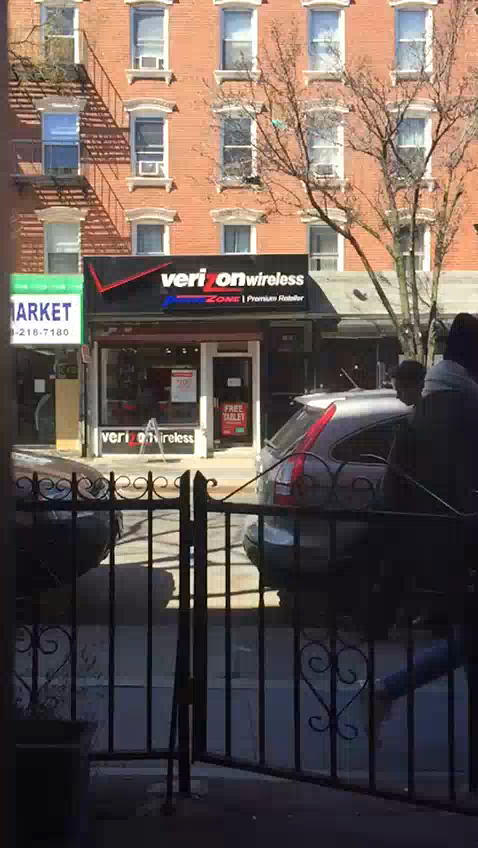

In [217]:
im

In [212]:

for j in range(0,frame_count):	# each pass = one image
    if j % frame_steps == 0:
        sys.stdout.write('		FRAME {}/{} - PROGRESS {}% – REMAINING {}\r'.format(str(j), str(frame_count), round(float(j)/float(frame_count)*100), str(datetime.timedelta(seconds=round((end_time-start_time)*((frame_count-j)/frame_steps)))))) ##ÄNDERN - ES IST NICHT DER FRAMECOUNT SONDERN DIE BILDBREITE - DAS SCRIPT KANN NUR DIE STREIFEN DER BILDBREITE DURCHLAUFEN; DANAHC WIRD ES SCHWARZ
        sys.stdout.flush()
        # start_time = time.time()
        command = [ 'ffmpeg',
            '-i', input_file,
            '-f', 'image2pipe',
            '-pix_fmt', 'rgb24',
            '-vcodec', 'rawvideo','-', '-nostats', '-hide_banner', '-loglevel', '0']
        pipe = sp.Popen(command, stdout = sp.PIPE, bufsize=10**8)
        pipe.stdout.flush()
        raw_image = pipe.stdout.read(video_height*video_width*3)
        image =  numpy.frombuffer(raw_image, dtype='uint8')
        #image = image.reshape((video_width,video_width,3)) # toggle between this and the next line if output is crap
        image = image.reshape((video_height,video_width,3))
        im = Image.fromarray(image)
        # im = im.rotate(-90) # toggle for rotation (to do: automate)
        w,h = im.size
#         for i in range(0,image_width,pixel_steps): # each pass = one "slice"
        try:
            im_ = im.crop((start_frame, 0, w-(w-slice_width)+start_frame, h))
            output_image.paste(im_,(j*slice_width,0))
#                 display(output_image)
        except Exception as e:
            print("error at %s" % (i))
            print(e)
            i=0
            break
#         display(output_image)
        if not os.path.exists(directory):
            os.makedirs(directory)
#         output_image.save(directory + "/pan_img-%04d.jpg" % (j))
    # end_time=time.time()
#     start_frame=start_frame+1


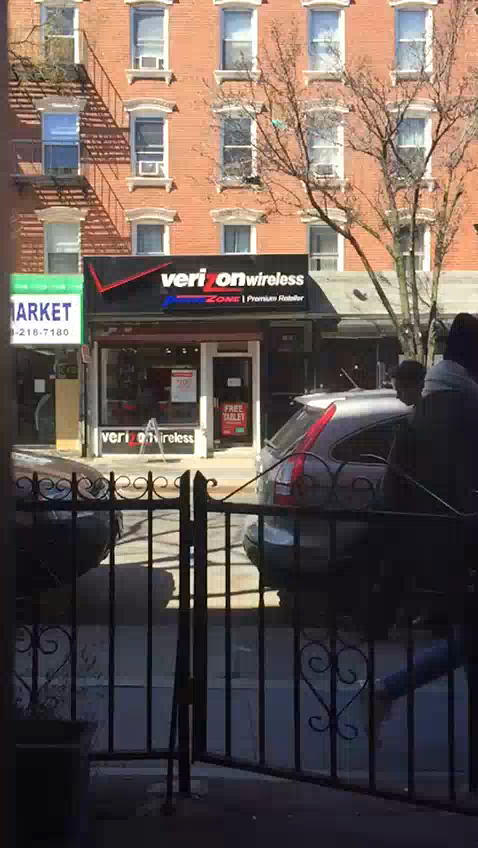

In [215]:
im

In [213]:
start_frame

100

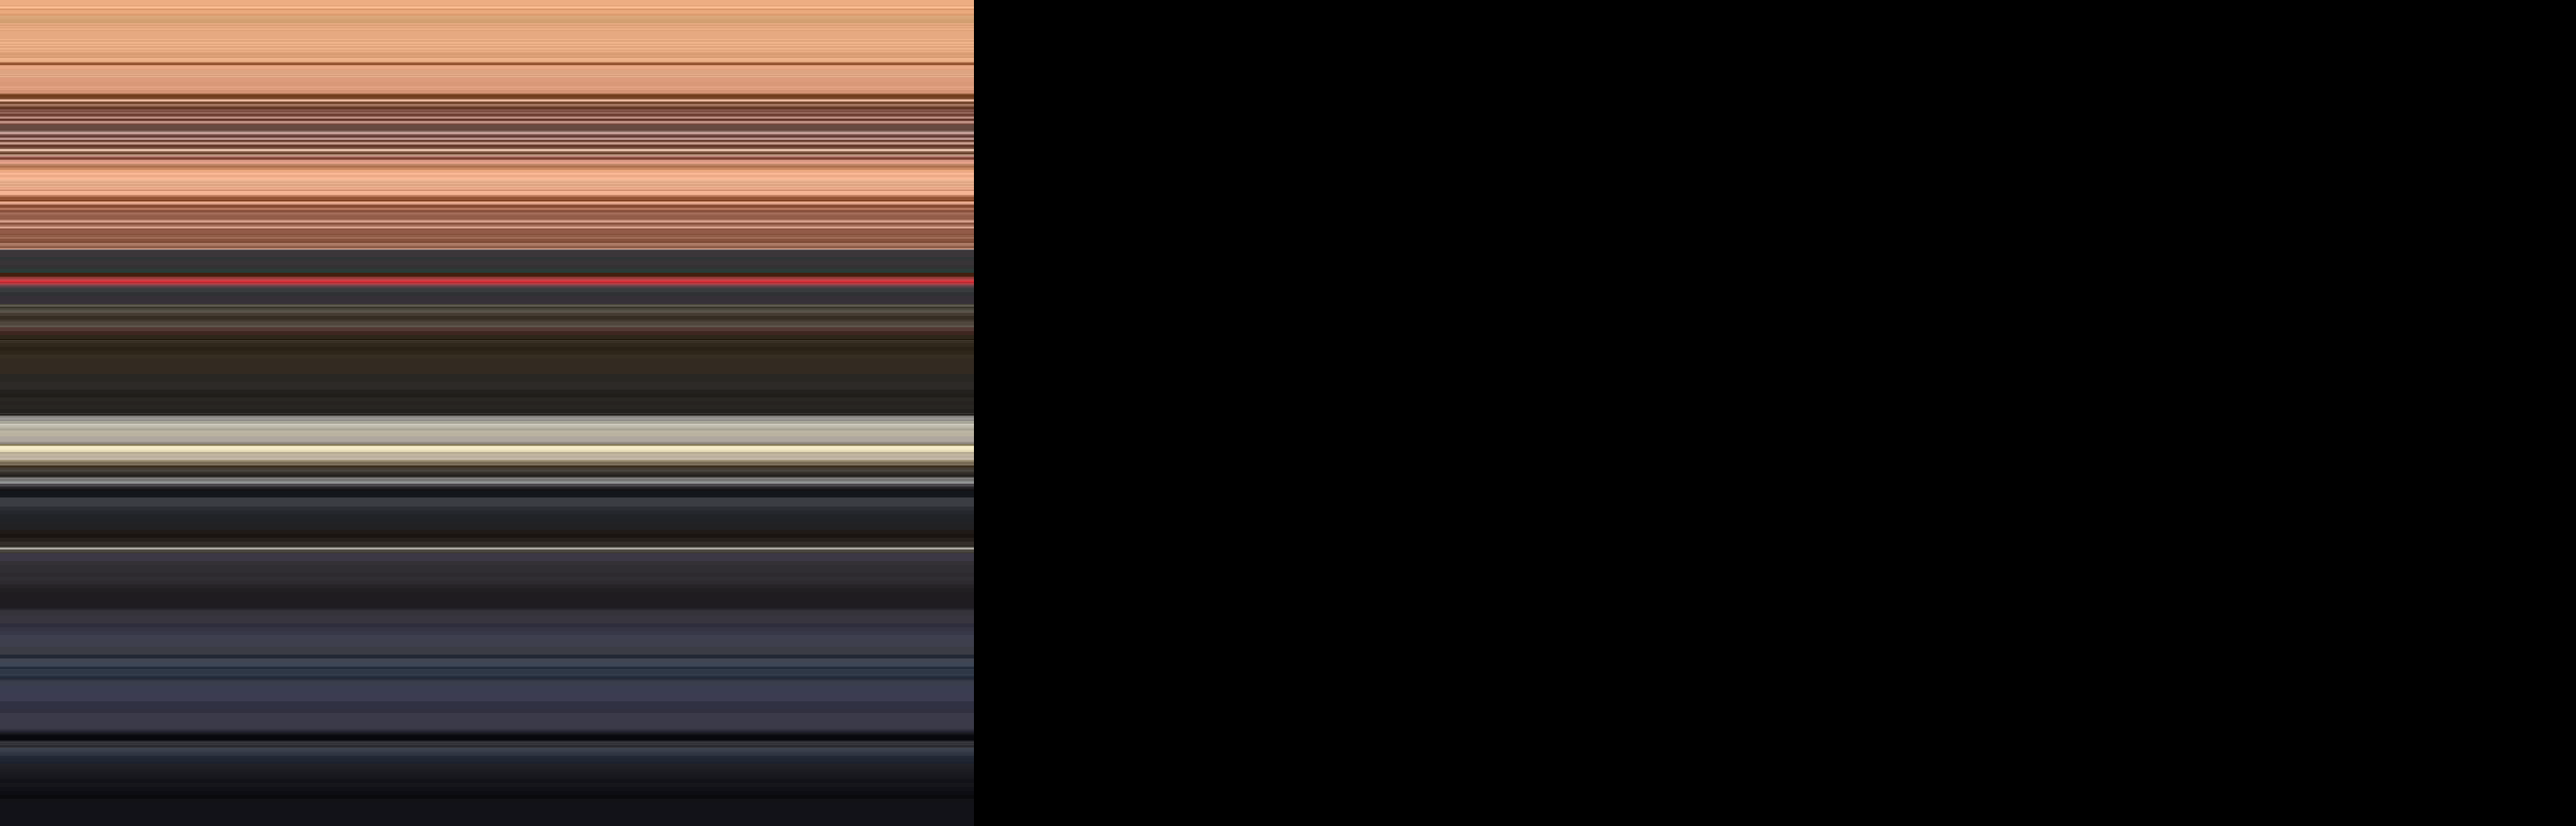

In [214]:
display(output_image)